In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('../../../Data/DL_Tutorial/RNN/Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
print(dataset_train.head())
print(training_set.shape)

       Date    Open    High     Low   Close      Volume
0  1/3/2012  325.25  332.83  324.97  663.59   7,380,500
1  1/4/2012  331.27  333.87  329.08  666.45   5,749,400
2  1/5/2012  329.83  330.75  326.89  657.21   6,590,300
3  1/6/2012  328.34  328.77  323.68  648.24   5,405,900
4  1/9/2012  322.04  322.29  309.46  620.76  11,688,800
(1258, 1)


## Feature Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1)) # 척도는 0 ~ 1사이로
training_set_scaled = scaler.fit_transform(training_set)
print(training_set_scaled.shape)
print(training_set_scaled)

(1258, 1)
[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


## Creating a data structure with 60 timestep and 1 output

In [6]:
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

## Reshaping

In [7]:
print(X_train.shape)

(1198, 60)


In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
print(X_train.shape)

(1198, 60, 1)


## Building the RNN

In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [12]:
regressor = Sequential([
    # Adding the first LSTM layer and some Dropout regularization
    LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)),
    Dropout(rate = 0.2),
    # Adding a second LSTM layer and some Dropout regularization
    LSTM(units = 50, return_sequences = True),
    Dropout(rate = 0.2),
    # Adding a third LSTM layer and some Dropout regularization
    LSTM(units = 50, return_sequences = True),
    Dropout(rate = 0.2),
    # Adding a fourth LSTM layer and some Dropout regularization
    LSTM(units = 50, return_sequences = False),
    Dropout(rate = 0.2),
    # Adding the output layer
    Dense(1)
])

2025-03-26 16:11:26.512395: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3 Pro
2025-03-26 16:11:26.513240: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 18.00 GB
2025-03-26 16:11:26.513303: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 6.00 GB
2025-03-26 16:11:26.513841: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-03-26 16:11:26.514133: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/opt/anaconda3/envs/ml_env/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequenti

## Making the predictions and visualizing the results

In [13]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32,  verbose = 2)

Epoch 1/100


2025-03-26 16:25:00.938955: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


38/38 - 4s - 114ms/step - loss: 0.0455
Epoch 2/100
38/38 - 1s - 24ms/step - loss: 0.0072
Epoch 3/100
38/38 - 1s - 27ms/step - loss: 0.0058
Epoch 4/100
38/38 - 1s - 23ms/step - loss: 0.0050
Epoch 5/100
38/38 - 1s - 23ms/step - loss: 0.0053
Epoch 6/100
38/38 - 1s - 26ms/step - loss: 0.0049
Epoch 7/100
38/38 - 1s - 25ms/step - loss: 0.0057
Epoch 8/100
38/38 - 1s - 25ms/step - loss: 0.0045
Epoch 9/100
38/38 - 1s - 23ms/step - loss: 0.0041
Epoch 10/100
38/38 - 1s - 26ms/step - loss: 0.0042
Epoch 11/100
38/38 - 1s - 28ms/step - loss: 0.0045
Epoch 12/100
38/38 - 1s - 25ms/step - loss: 0.0041
Epoch 13/100
38/38 - 1s - 25ms/step - loss: 0.0039
Epoch 14/100
38/38 - 1s - 28ms/step - loss: 0.0043
Epoch 15/100
38/38 - 1s - 28ms/step - loss: 0.0038
Epoch 16/100
38/38 - 1s - 25ms/step - loss: 0.0044
Epoch 17/100
38/38 - 1s - 24ms/step - loss: 0.0038
Epoch 18/100
38/38 - 1s - 25ms/step - loss: 0.0039
Epoch 19/100
38/38 - 1s - 26ms/step - loss: 0.0034
Epoch 20/100
38/38 - 1s - 26ms/step - loss: 0.0038


## Making the predictions and visualizing the results

In [16]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('../../../Data/DL_Tutorial/RNN/Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
real_stock_price.shape

(20, 1)

In [19]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs

array([779.  , 779.66, 777.71, 786.66, 783.76, 781.22, 781.65, 779.8 ,
       787.85, 798.24, 803.3 , 795.  , 804.9 , 816.68, 806.34, 801.  ,
       808.35, 795.47, 782.89, 778.2 , 767.25, 750.66, 774.5 , 783.4 ,
       779.94, 791.17, 756.54, 755.6 , 746.97, 755.2 , 766.92, 771.37,
       762.61, 772.63, 767.73, 764.26, 760.  , 771.53, 770.07, 757.44,
       744.59, 757.71, 764.73, 761.  , 772.48, 780.  , 785.04, 793.9 ,
       797.4 , 797.34, 800.4 , 790.22, 796.76, 795.84, 792.36, 790.9 ,
       790.68, 793.7 , 783.33, 782.75, 778.81, 788.36, 786.08, 795.26,
       806.4 , 807.86, 805.  , 807.14, 807.48, 807.08, 805.81, 805.12,
       806.91, 807.25, 822.3 , 829.62, 837.81, 834.71, 814.66, 796.86])

In [20]:
inputs = inputs.reshape(-1, 1)
inputs

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [21]:
inputs = scaler.fit_transform(inputs)
X_test = []
y_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
    y_test.append(inputs[i, 0])
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

predicted_stock_price = regressor.predict(X_test)
print(predicted_stock_price)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)
print(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
[[0.46008343]
 [0.42958468]
 [0.4160983 ]
 [0.42067453]
 [0.45129013]
 [0.5182197 ]
 [0.5940612 ]
 [0.6367014 ]
 [0.64881945]
 [0.645796  ]
 [0.6386301 ]
 [0.6311162 ]
 [0.62553036]
 [0.62814724]
 [0.6378057 ]
 [0.6867229 ]
 [0.7704912 ]
 [0.86318314]
 [0.90870357]
 [0.8595619 ]]
[[787.479  ]
 [784.6359 ]
 [783.37866]
 [783.8053 ]
 [786.65924]
 [792.89844]
 [799.9684 ]
 [803.9433 ]
 [805.07294]
 [804.79114]
 [804.1231 ]
 [803.42267]
 [802.9019 ]
 [803.1458 ]
 [804.04626]
 [808.60626]
 [816.4152 ]
 [825.0559 ]
 [829.2993 ]
 [824.7183 ]]


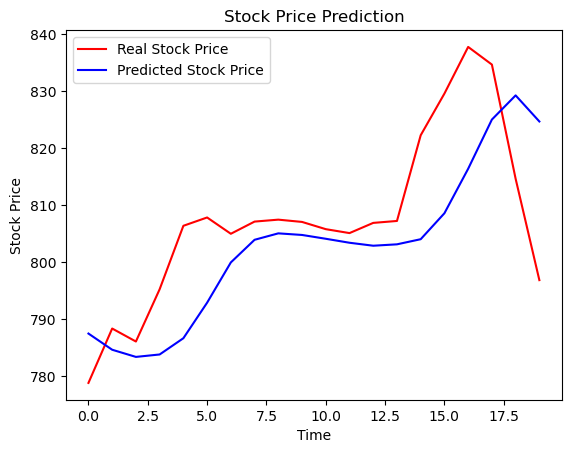

In [22]:
plt.plot(real_stock_price, label = 'Real Stock Price', color = 'red')
plt.plot(predicted_stock_price, label = 'Predicted Stock Price', color = 'blue')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
